In [ ]:
%pip install -qU 'langgraph==0.2.45' 'langchain-google-genai==2.0.4' langchain-chroma langchain-huggingface datasets wikipedia langchain-community

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from typing import Annotated, Literal
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langchain_core.messages.ai import AIMessage
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
import langchain_google_genai as genai
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings

from IPython.display import Image, display

In [ ]:
import os
from google.colab import userdata

# from kaggle_secrets import UserSecretsClient
# GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:
llm = genai.ChatGoogleGenerativeAI(model="gemini-2.0-flash-001")

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

vector_store = Chroma(embedding_function=embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# vc = Chroma(embedding_function=embeddings)
# vc.add_texts(["first sentence"], ids=["002"], metadatas=[])
# vc.get(ids=['002'])

### Loading dataset and adding it to vector store

Dataset used: https://huggingface.co/datasets/Madnesss/manga-query  

In [ ]:
from datasets import load_dataset

ds = load_dataset("Madnesss/manga-query", split='train')
ds = ds.to_pandas()

# ds.set_format("pandas")
# ds = ds.with_format("pandas")

data-manga.csv:   0%|          | 0.00/29.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/48364 [00:00<?, ? examples/s]

In [ ]:
ds.head(5)

,Unnamed: 0,title,description,tags,cover,q
0,0,Salad Days (Tang LiuZang) - Part 2,The second season of Salad Days (Tang LiuZang).,"['BL', 'Manhua', 'Romance', 'Shounen-ai', 'Spo...",https://cdn.anime-planet.com/manga/primary/sal...,What manga is similar to Salad Days (Tang LiuZ...
1,1,The Master of Diabolism,As the grandmaster who founded the Demonic Sec...,"['Action', 'Adventure', 'BL', 'Comedy', 'Manhu...",https://cdn.anime-planet.com/manga/primary/the...,What is the story of Wei WuXian?
2,2,JoJo's Bizarre Adventure Part 7: Steel Ball Run,"Set in 1890, Steel Ball Run spotlights Gyro Ze...","['Action', 'Adventure', 'Horror', 'Mystery', '...",https://cdn.anime-planet.com/manga/primary/joj...,What is the name of the manga set in 1890?
3,3,A Sign of Affection,"Yuki is a typical college student, whose world...","['Romance', 'Shoujo', 'Slice of Life', 'Disabi...",https://cdn.anime-planet.com/manga/primary/a-s...,What is a manga about a college student who me...
4,4,Moriarty the Patriot,"Before he was Sherlock’s rival, Moriarty fough...","['Mystery', 'Shounen', 'Detectives', 'England'...",https://cdn.anime-planet.com/manga/primary/mor...,What is the name of a manga about a character ...


In [ ]:
from string import Template

def get_tags(s: str) -> list[str]:
    """Takes in string of tags and returns a list of tags"""
    s = s[2:-2]
    s = s.replace("'", "")
    s = s.split(", ")
    return s


def add_docs(row):
    """Add information from row to vector store"""
    info = f"""title: {row['title']}
    description: {row['description']}
    tags: {row['tags']}
    """

    mt = {tg: True for tg in get_tags(row['tags'])}
    vector_store.add_texts([info], ids=[row['title'] + "_" + str(row.iloc[0])], metadatas=[mt])


In [ ]:
# only take 10000 entries for now
ds[:10000].apply(add_docs, axis=1)

,0
0,None
1,None
2,None
3,None
4,None
...,...
9995,None
9996,None
9997,None
9998,None


### Defining agent and tools

In [ ]:
MANGA_SYSINT = """
    "system",
    You are a bot that finds or recommends a manga. A human will talk to you.
    User is either looking for a manga title based on description or looking for recommendations based on their taste.
    You may ask questions to get better understanding of the manga. You also have a database with manga inofrmation.
    Each entry in the database is in the form:  title: manga title, description: brief summary, tags: genra or tags of manga.
    You can generate a query in similar form based on the responses and query the database.
    Keep your questions and answers brief. Make sure to get as much information as you can get by asking questions before querying.
    Be sure to ask about what tags to exclude and pass them along with query.
    Share titles along with brief description and tags of manga that you think fits users requirements.
    If you have multiple share at-most 3. If no manga matches requirements just say so.
    To keep up with updated information you can query the database again.
    You can also search information about manga from wikipedia to get more information about a manga.
    Know that you can only search wikipedia and not other websites. If user asks more information answer in a short paragraph.
    If Wikipedia search doesn't return anything usefull then use the information that you have from earlier database query instead.
    /n/n
    Query the database with retrieve_mangas. It takes query and list of tags to exclude as araguments.
    Search title on wikipedia using wikipedia_search. It takes query as argument.
    /n/n
    Format your response properly so that the length of lines is not too big by using line breaks..
    Once user has found the book or has decided to end the conversation, thank the user and say goodbye.
"""

WELCOME_MSG = "Welcome. Type `q` to quit. How may I help you today?"

In [ ]:
from langchain.utilities import WikipediaAPIWrapper

# def filter_docs(docs, exclude):
#     for ex in exclude:
#         docs = [doc for doc in docs if not doc.metadata.get(ex)]
#     return docs


@tool(response_format="content_and_artifact")
def retrieve_mangas(query: str, exclude: list[str]) -> str:
    """Retrieve information related to a query."""
    # retrieved_docs = vector_store.similarity_search(query, k=10)
    if not exclude:
        retrieved_docs = vector_store.similarity_search(query, k=10)
        context = "\n".join(doc.page_content for doc in  retrieved_docs)
        return context, retrieved_docs

    if len(exclude) > 1:
        wd = {"$and": [{"$not_contains": tg} for tg in exclude]}
    else:
        wd = {"$not_contains": exclude[0]}
    retrieved_docs = vector_store.similarity_search(query, k=10, where_document=wd)
    context = "\n".join(doc.page_content for doc in  retrieved_docs)
    # retrieved_docs = filter_docs(retrieved_docs, exclude)
    return context, retrieved_docs


@tool
def wikipedia_search(query: str) -> str:
    """Searches Wikipedia for information."""
    wikipedia = WikipediaAPIWrapper()
    result = wikipedia.run(query)
    return result

In [ ]:
class StateDict(TypedDict):
    """A dictionary of state variables."""
    messages: Annotated[list, add_messages]
    finished: bool

def human_node(state: StateDict) -> StateDict:
    """Display the last model message to the user, and receive the user's input."""
    last_msg = state["messages"][-1]
    print("Model:", last_msg.content)

    user_input = input("User: ")

    if user_input in {"q", "quit", "exit", "goodbye"}:
        state["finished"] = True

    return state | {"messages": [("user", user_input)]}


def maybe_exit_human_node(state: StateDict) -> Literal["chatbot", "__end__"]:
    """Route to the chatbot, unless it looks like the user is exiting."""
    if state.get("finished", False):
        return END
    else:
        return "chatbot"

In [ ]:
def maybe_route_to_tools(state: StateDict) -> Literal["tools", "human"]:
    """Route between human or tool nodes, depending if a tool call is made."""
    if not (msgs := state.get("messages", [])):
        raise ValueError(f"No messages found when parsing state: {state}")

    # Only route based on the last message.
    msg = msgs[-1]

    # When the chatbot returns tool_calls, route to the "tools" node.
    if hasattr(msg, "tool_calls") and len(msg.tool_calls) > 0:
        return "tools"
    else:
        return "human"


def chatbot_with_tools(state: StateDict) -> StateDict:
    """The chatbot with tools. A simple wrapper around the model's own chat interface."""
    defaults = {"finished": False}

    if state["messages"]:
        new_output = llm_with_tools.invoke([MANGA_SYSINT] + state["messages"])
    else:
        new_output = AIMessage(content=WELCOME_MSG)

    # Set up some defaults if not already set, then pass through the provided state,
    # overriding only the "messages" field.
    return defaults | state | {"messages": [new_output]}

In [ ]:
graph_builder = StateGraph(StateDict)


tools = [retrieve_mangas, wikipedia_search]
tool_node = ToolNode(tools)

# attach tools to llm
llm_with_tools = llm.bind_tools(tools)

# Add the nodes, including the new tool_node.
graph_builder.add_node("chatbot", chatbot_with_tools)
graph_builder.add_node("human", human_node)
graph_builder.add_node("tools", tool_node)


graph_builder.add_conditional_edges("chatbot", maybe_route_to_tools)
graph_builder.add_conditional_edges("human", maybe_exit_human_node)

# Tools always route back to chat afterwards.
graph_builder.add_edge("tools", "chatbot")

graph_builder.add_edge(START, "chatbot")

graph_with_rag = graph_builder.compile()

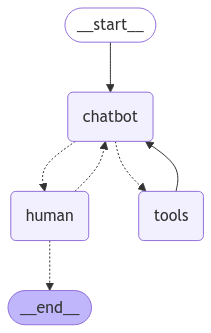

In [ ]:
Image(graph_with_rag.get_graph().draw_mermaid_png())

In [ ]:
state = graph_with_rag.invoke({"messages": []})

Model: Welcome. Type `q` to quit. How may I help you today?
User: I am looking for something to read.
Model: Okay. What kind of manga are you interested in? What genres do you prefer, and are there any genres or themes you want to avoid?

User: Something with mysteries and smart characters.  Also something casual is nice.
Model: Got it. So you're looking for a manga with mysteries, smart characters, and a casual tone. Are there any specific genres you want to exclude, like horror or romance?

User: Exclude historical settings.
Model: Okay, I found several manga that might interest you:

1.  **Black Detective**: A comedy mystery about a teenager who becomes the sidekick to a gifted but morally questionable detective. Tags: Comedy, Mystery, Shounen, Detectives.

2.  **Sherlock**: A modern take on Sherlock Holmes, solving crimes in present-day London. Tags: Drama, Mystery, Seinen, Crime, Detectives, Psychological, Sherlock Holmes, Based on a TV Series.

3.  **Shin'ai naru A-jou e no Myste